### Importing all the packages

In [1]:
import pandas as pd
import numpy as np
# Packages for visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="whitegrid")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import datetime
import pickle

---
The code is split into functions

**view_data** - Displays information about the loaded data <br/>
**transform_data** - Transforms the given data in numpy arrays <br/>
**retransform_data** - Uses defined scaler object to transform the data <br/>
**train_model** - Trains a Decision Tree Classifier <br/>
**retrain_model** - Retrains a given model with new data <br/>
**save_model** - Saves the model to specified location <br/>
**save_data_object** - Saves the scaler and encoder objects <br/>
**load_model** - Loads the specified model <br/>
**load_data_object** - Loads the scaler and encoder <br/>

---

In [2]:
def view_data(data):
    print(data.head())
    plt.figure(figsize=(12, 8), dpi=120)
    grid = plt.GridSpec(2, 2, wspace = .25, hspace = .25)
    # plt.subplots_adjust(wspace= 0.25, hspace= 0.25)
    plt.subplot(grid[0, 0])
    sns.scatterplot(data=data, x="Lum", y="KMag", hue="SpType")
    plt.subplot(grid[0, 1])
    sns.scatterplot(data=data[data["Lum"]<5000], x="Lum", y="KMag", hue="SpType")
    plt.subplot(grid[1,:])
    sns.scatterplot(data=data[data["Lum"]<1000], x="Lum", y="KMag", hue="SpType")
    print('-----------------------------------------------------------------------')
    print(data.info())
    print('-----------------------------------------------------------------------')

In [3]:
def transform_data(data):
    X = data.drop(columns=["SpType"],axis=1)
    y = data[["SpType"]]
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    enc = OrdinalEncoder()
    y = enc.fit_transform(y)
#     print(X)
#     print(y)
    
    return X,y,scaler,enc

In [4]:
def retransform_data(data,scaler,encoder):
    X = data.drop(columns=["SpType"],axis=1)
    y = data[["SpType"]]
    X = scaler.fit_transform(X)
    y = encoder.fit_transform(y)
    return X,y

In [5]:
def train_model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    clf = DecisionTreeClassifier(random_state=1)
    model = clf.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Accuracy: ",accuracy_score(y_test,y_pred))
    print("CV Score: ",cross_val_score(model, X, y, cv=10))
    return model

In [6]:
def retrain_model(X,y,model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Accuracy: ",accuracy_score(y_test,y_pred))
    print("CV Score: ",cross_val_score(model, X, y, cv=10))
    return model

In [7]:
def save_model(model,filename):
    path = "./models/"+filename+".pkl"
    with open(path,"wb") as fp:
        pickle.dump(model,fp)
    print("Model saved at: ",path)

In [8]:
def save_data_objects(scaler,encoder):
    scalepath = "./models/data_scaler.pkl"
    encpath = "./models/data_encoder.pkl"
    with open(scalepath,"wb") as fp:
        pickle.dump(scaler,fp)
    with open(encpath,"wb") as fp:
        pickle.dump(encoder,fp)
    print("Scaler saved at: ",scalepath)
    print("Encoder saved at: ",encpath)

In [9]:
def load_data_objects():
    scalepath = "./models/data_scaler.pkl"
    encpath = "./models/data_encoder.pkl"
    scaler,encoder = None,None
    with open(scalepath,"rb") as fp:
        scaler = pickle.load(fp)
    with open(encpath,"rb") as fp:
        encoder = pickle.load(fp)
    return scaler,encoder

In [10]:
def load_model(filename):
    path = "./models/"+filename+".pkl"
    model = None
    with open(path,"rb") as fp:
        model = pickle.load(fp)
    return model

### Training the first time

         GLon       GLat SpType      KMag         Lum
0  112.090028 -22.927559      B -0.033239  436.650000
1  320.793090 -63.415308      F  1.570000    9.170000
2  337.897761 -72.861670      G  1.775143    1.013512
3   99.218329 -56.541799      K -0.034728    0.142433
4  106.820210 -41.223162      K  3.780000    0.490000
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9807 entries, 0 to 9806
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GLon    9807 non-null   float64
 1   GLat    9807 non-null   float64
 2   SpType  9807 non-null   object 
 3   KMag    9807 non-null   float64
 4   Lum     9807 non-null   float64
dtypes: float64(4), object(1)
memory usage: 383.2+ KB
None
-----------------------------------------------------------------------


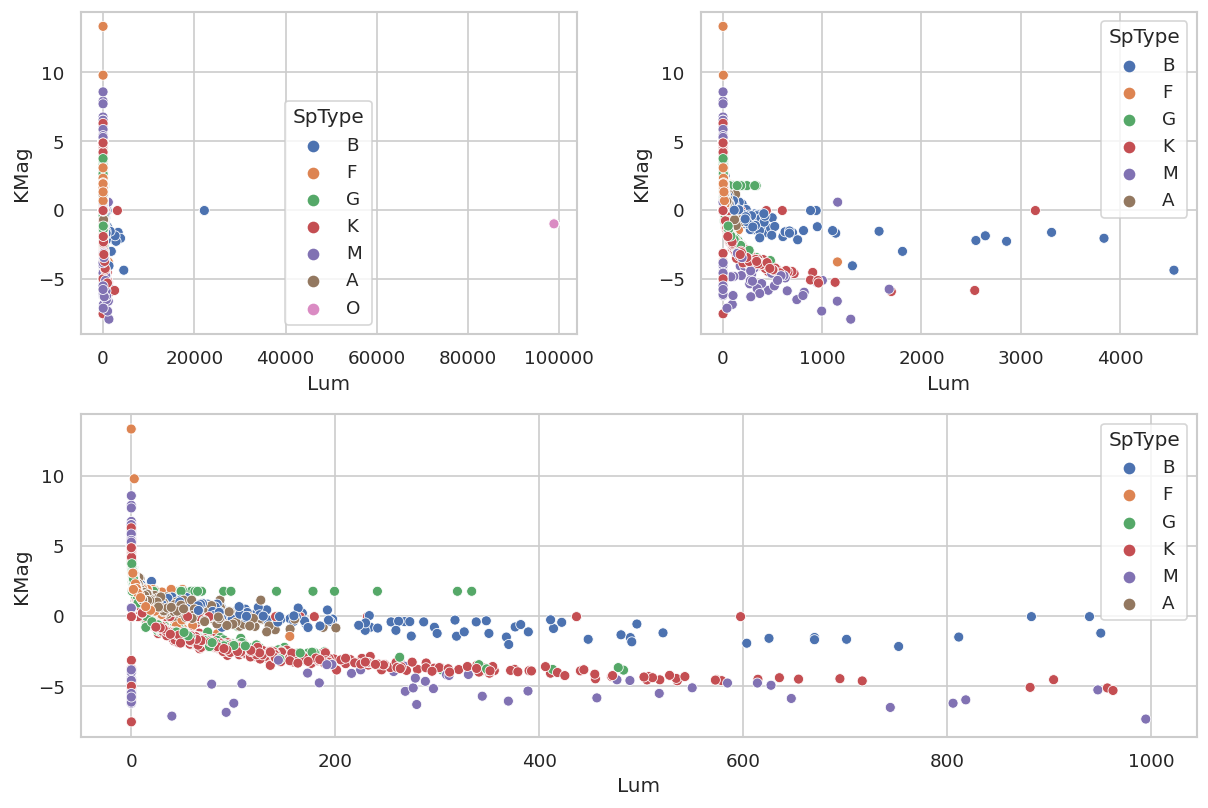

In [11]:
data = pd.read_csv("./data/stellar_data_1.csv")
view_data(data)

In [12]:
X,y,scaler,encoder = transform_data(data)
model = train_model(X,y)

Accuracy:  0.8496432212028542
CV Score:  [0.81753313 0.8470948  0.85626911 0.83995923 0.82466871 0.86034659
 0.86544343 0.85612245 0.83877551 0.86428571]


In [13]:
# save_data_objects(scaler,encoder)
save_model(model,"stellarclassifier_v1")

Model saved at:  ./models/stellarclassifier_v1.pkl


### Retraining the model on new data

In [14]:
import os
import re

In [16]:
datafiles = [f for f in os.listdir('./data/') if re.match(r'stellar_data_[0-9]+.csv', f)]
datafiles.remove('stellar_data_1.csv')
datafiles.sort()
datafiles.append(datafiles.pop(datafiles.index('stellar_data_10.csv')))

In [17]:
datafiles

In [25]:
scaler, encoder = load_data_objects()
for item in datafiles[:-1]:
    path = "./data/"+item
    datadf = pd.read_csv(path)
    ver = int(item.split(".")[0][-1])-1
    curr_ver = str(int(ver)+1)
    model = load_model("stellarclassifier_v"+str(ver))
    X,y = retransform_data(datadf,scaler,encoder)
    model = retrain_model(X,y,model)
    save_model(model,"stellarclassifier_v"+curr_ver)

Accuracy:  0.8492307692307692
CV Score:  [0.83589744 0.84512821 0.85641026 0.83692308 0.82358974 0.86051282
 0.84102564 0.81128205 0.86153846 0.83692308]
Model saved at:  ./models/stellarclassifier_v2.pkl
Accuracy:  0.8515505846466701
CV Score:  [0.82825203 0.82299084 0.86775178 0.85859613 0.85961343 0.84537131
 0.82909461 0.85045778 0.8636826  0.83418108]
Model saved at:  ./models/stellarclassifier_v3.pkl
Accuracy:  0.8623336745138178
CV Score:  [0.86489253 0.85261003 0.87922211 0.87819857 0.86898669 0.85977482
 0.87819857 0.87103378 0.84528689 0.82377049]
Model saved at:  ./models/stellarclassifier_v4.pkl
Accuracy:  0.8591117917304747
CV Score:  [0.84693878 0.85597549 0.84780388 0.84167518 0.85188968 0.85393258
 0.87027579 0.84678243 0.85291113 0.84984678]
Model saved at:  ./models/stellarclassifier_v5.pkl
Accuracy:  0.8493360572012257
CV Score:  [0.83248212 0.84269663 0.84576098 0.85291113 0.82737487 0.86108274
 0.84662577 0.86503067 0.84969325 0.82310838]
Model saved at:  ./models/